# Iris Flower Classification Project = Machine learning

I would recommend this dataset to anyone who is a beginner in data science and is eager to build their first ML model. See below for some of nice characteristics of this dataset:

150 samples, with 4 attributes (same units, all numeric)

Balanced class distribution (50 samples for each class)

No missing data

As you can see, these characteristics can help minimize the time you need to spend in the data preparation process so you can focus on building the ML model. It is NOT that the preparation stage is not important. On the contrary, this process is so important that it can be too time-consuming for some beginners that they may overwhelm themselves before getting to the model development stage.

## Objectives
There are two questions that we want to be able to answer after exploring this dataset, which are quite typical in most classification problems:
* Prediction — given new data points, how accurately can the model predict their classes (species)?
* Inference — Which predictor(s) can effectively help with the predictions?

### Import Libraries and Load Dataset
First, we need to import some libraries: pandas (loading dataset), numpy (matrix manipulation), matplotlib and seaborn (visualization), and sklearn (building classifiers). Make sure they are installed already before importing them 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('iris.csv')


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### Train-Test Split
Now, we can split the dataset into a training set and a test set. In general, we should also have a validation set, which is used to evaluate the performance of each classifier and fine-tune the model parameters in order to determine the best model. The test set is mainly used for reporting purposes. However, due to the small size of this dataset, we can simplify this process by using the test set to serve the purpose of the validation set.
In addition, I used a stratified hold-out approach to estimate model accuracy. The other approach is to do cross-validation to reduce bias and variances.

In [6]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['Species'], random_state = 42)

Note: The general rule of thumb is have 20–30% of dataset as the test set. Due to the small size of this dataset, I chose 40% to ensure there are enough data points to test the model performance.

#### Exploratory Data Analysis
After we split the dataset, we can go ahead to explore the training data. Both matplotlib and seaborn have great plotting tools then we can use for visualization.
Let’s first create some univariate plots, through a histogram for each feature

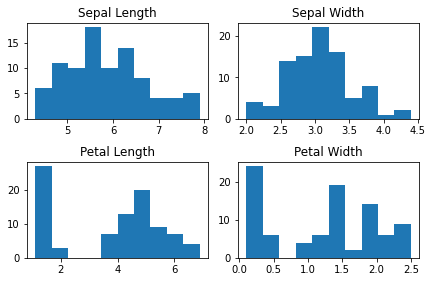

In [7]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['SepalLengthCm'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['SepalWidthCm'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['PetalLengthCm'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['PetalWidthCm'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

Note that for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.
Next, let’s try some side-by-side box plots:

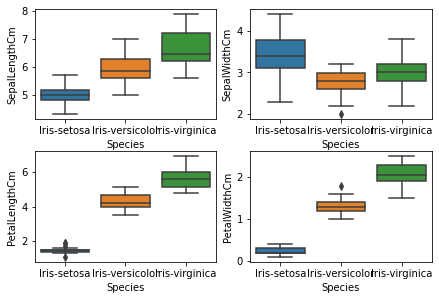

In [8]:
fig, axs = plt.subplots(2, 2)
fn = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=0.1);

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.
Violin plot is another type of visualization, which combines the benefit of both histogram and box plot:

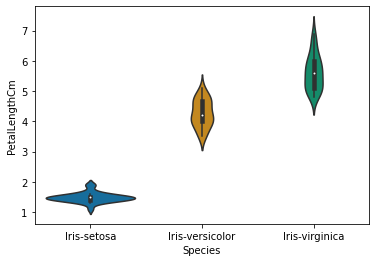

In [9]:
sns.violinplot(x="Species", y="PetalLengthCm", data=train, size=5, order = cn, palette = 'colorblind');

Now we can make scatterplots of all-paired attributes by using seaborn’s pairplot function:

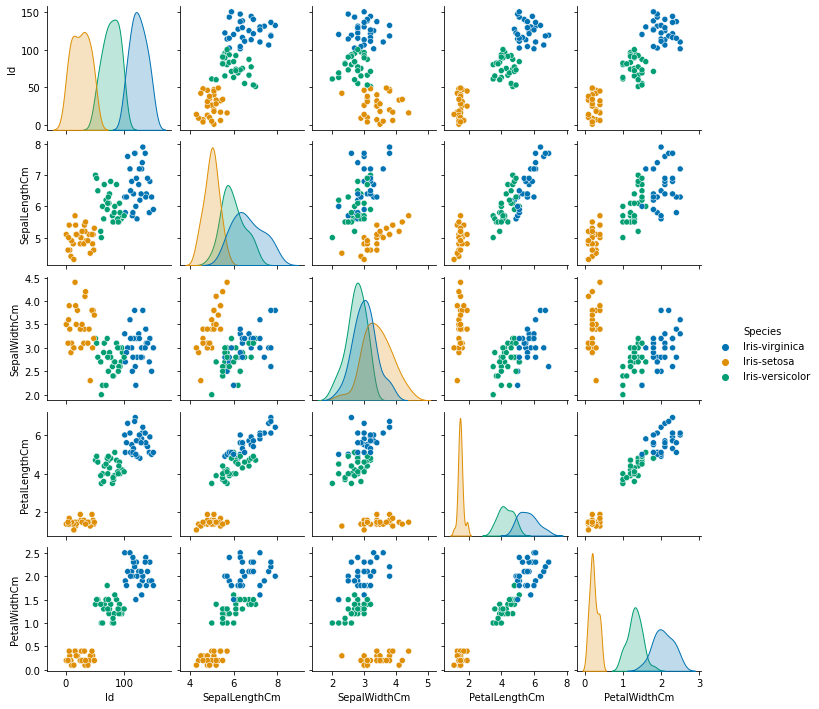

In [10]:
sns.pairplot(train, hue="Species", height = 2, palette = 'colorblind');

Note that some variables seem to be highly correlated, e.g., petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

Next, let’s make a correlation matrix to quantitatively examine the relationship between variables:

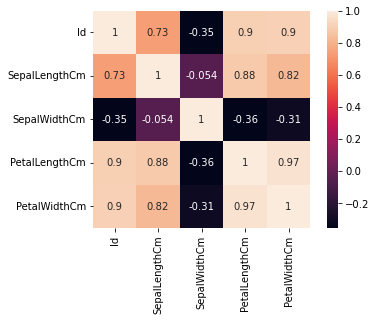

In [11]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

Another cool visualization tool is parallel coordinate plot, which represents each sample as a line.

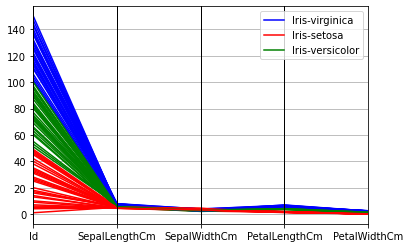

In [12]:
parallel_coordinates(train, "Species", color = ['blue', 'red', 'green']);

As we have seen before, petal measurements can separate species better than the sepal ones.


### Build Classifiers
Now we are ready to build some classifiers (woo-hoo!)
To make our lives easier, let’s separate out the class label and features first:

In [13]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

### Classification Tree
The first classifier that comes up to my mind is a discriminative classification model called classification trees (read more here). The reason is that we get to see the classification rules and it is easy to interpret.
Let’s build one using sklearn (documentation), with a maximum depth of 3, and we can check its accuracy on the test data:

In [14]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


This decision tree predicts 98.3% of the test data correctly. One nice thing about this model is that you can see the importance of each predictor through its feature_importances_ attribute:

In [15]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

From the output and based on the indices of the four features, we know that the first two features (sepal measurements) are of no importance, and only the petal ones are used to build this tree.
Another nice thing about the decision tree is that we can visualize the classification rules through plot_tree:

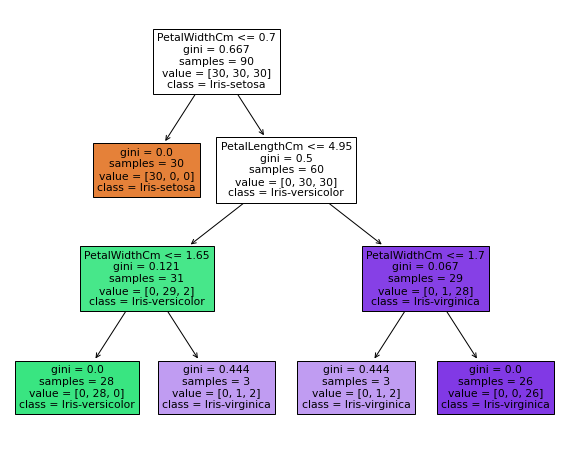

In [16]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

Apart from each rule (e.g. the first criterion is petal_width ≤ 0.7), we can also see the Gini index (impurity measure) at each split, assigned class, etc. Note that all terminal nodes are pure besides the two “light purple” boxes at the bottom. We can less confident regarding instances in those two categories.
To demonstrate how easy it is to classify new data points, say a new instance has a petal length of 4.5cm and a petal width of 1.5cm, then we can predict it to be versicolor following the rules.
Since only the petal features are being used, we can visualize the decision boundary and plot the test data in 2D:

Out of the 60 data points, 59 are correctly classified. Another way to show the prediction results is through a confusion matrix:

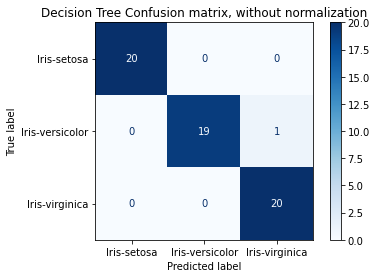

In [17]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

Through this matrix, we see that there is one versicolor which we predict to be virginica.
One downside is building a single tree is its instability, which can be improved through ensemble techniques such as random forests, boosting, etc. For now, let’s move on to the next model.

#### Gaussian Naive Bayes Classifier
One of the most popular classification models is Naive Bayes. It contains the word “Naive” because it has a key assumption of class-conditional independence, which means that given the class, each feature’s value is assumed to be independent of that of any other feature (read more here).
We know that it is clearly not the case here, evidenced by the high correlation between the petal features. Let’s examine the test accuracy using this model to see whether this assumption is robust:

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933

Interestingly, using only two features results in more correctly classified points, suggesting possibility of over-fitting when using all features. Seems that our Naive Bayes classifier did a decent job.

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


#### Linear Discriminant Analysis (LDA)

If we use multivariate Gaussian distribution to calculate the class conditional density instead of taking a product of univariate Gaussian distribution (used in Naive Bayes), we would then get a LDA model (read more here). The key assumption of LDA is that the covariances are equal among classes. We can examine the test accuracy using all features and only petal features:

The accuracy of the LDA Classifier on test data is 0.983

The accuracy of the LDA Classifier with two predictors on test data is 0.933

###  Summary.
We explored the Iris dataset, and then built a few popular classifiers using sklearn.
We saw that the petal measurements are more helpful at classifying instances than the sepal ones. Furthermore, most models achieved a test accuracy of over 98%.